In [15]:

import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import roc_auc_score

s=time.time()


df_train = pd.read_excel('df_total_train.xlsx', na_values=['-OVER','+OVER'])
df_train.interpolate(inplace=True)

df_test = pd.read_excel('df_total_test.xlsx', na_values=['-OVER','+OVER'])
df_test.interpolate(inplace=True)

x_train = df_train.drop(['Heat_ON'],axis=1)
y_train = df_train['Heat_ON']

x_test = df_test.drop(['Heat_ON'],axis=1)
y_test = df_test['Heat_ON']

# lightgbm classifier 선택
lgbmclf = LGBMClassifier(random_state=0, n_estimators=200, learning_rate=0.05)
# REFCV로 Feature들을 반복적으로 제거해가면서 학습/평가 수행
evals = [(x_test, y_test)]
lgbmclf.fit(x_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)
lgbmclf_roc_score=roc_auc_score(y_test, lgbmclf.predict_proba(x_test)[:,1],average='macro')
print('roc auc : {0:.4f}'.format(lgbmclf_roc_score))
print(time.time()-s)

C:\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  

[1]	valid_0's auc: 0.999837	valid_0's binary_logloss: 0.633254
[2]	valid_0's auc: 0.999837	valid_0's binary_logloss: 0.589489
[3]	valid_0's auc: 0.999824	valid_0's binary_logloss: 0.54983
[4]	valid_0's auc: 0.999947	valid_0's binary_logloss: 0.513721
[5]	valid_0's auc: 0.999948	valid_0's binary_logloss: 0.480703
[6]	valid_0's auc: 0.999948	valid_0's binary_logloss: 0.45041
[7]	valid_0's auc: 0.999949	valid_0's binary_logloss: 0.422533
[8]	valid_0's auc: 0.999949	valid_0's binary_logloss: 0.396809
[9]	valid_0's auc: 0.99995	valid_0's binary_logloss: 0.373004
[10]	valid_0's auc: 0.999995	valid_0's binary_logloss: 0.350939
[11]	valid_0's auc: 0.999995	valid_0's binary_logloss: 0.330442
[12]	valid_0's auc: 0.999996	valid_0's binary_logloss: 0.311365
[13]	valid_0's auc: 0.999996	valid_0's binary_logloss: 0.293596
[14]	valid_0's auc: 0.999996	valid_0's binary_logloss: 0.277009
[15]	valid_0's auc: 0.999996	valid_0's binary_logloss: 0.261508
[16]	valid_0's auc: 0.999996	valid_0's binary_loglos

[151]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.000970946
[152]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.000965158
[153]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.000960015
[154]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.00094734
[155]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.000943533
[156]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.000940288
[157]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.000937517
[158]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.000927029
[159]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.000925117
[160]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.000915791
[161]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.000914899
[162]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.000914561
[163]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.000914562
[164]	valid_0's auc: 0.999999	valid_0's binary_logloss: 0.000914478
[165]	valid_0's auc: 0.999999	valid_0's binary_lo

In [4]:
from sklearn.metrics import roc_auc_score

In [5]:
lgbmclf_roc_score=roc_auc_score(y_test, lgbmclf.predict_proba(x_test)[:,1],average='macro')
print('roc auc : {0:.4f}'.format(lgbmclf_roc_score))

roc auc : 1.0000


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

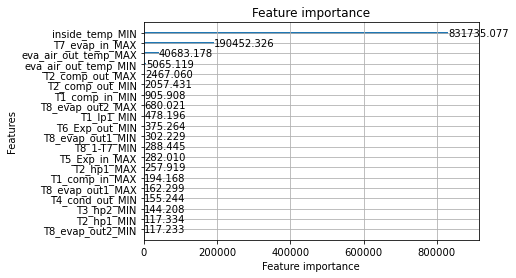

In [13]:
from lightgbm import plot_importance
plot_importance(lgbmclf,max_num_features=20, importance_type='gain')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

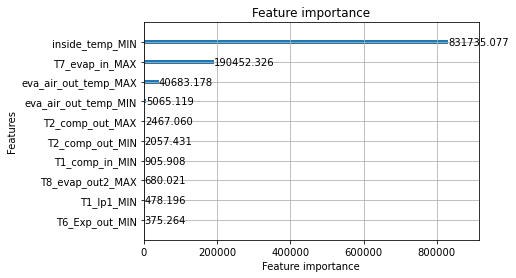

In [14]:
from lightgbm import plot_importance
plot_importance(lgbmclf,max_num_features=10, importance_type='gain')

In [16]:
y_pred = lgbmclf.predict(x_test)
from sklearn.metrics import roc_auc_score, f1_score
f1_score(y_test, y_pred, pos_label='On')

0.9998683968099388